# CORONAVIRUS SURVIVAL PREDICTION BASED ON SYMPTOMS

This notebook tracks the survival of  coronavirus patients on the basis of various symptoms like cold,fever,pneumonia etc.Coronavirus is a contagious respiratory virus that first started in December 2019 in China.It is declared as a pandemic by World Health Organisation.
Dataset is uploaded at 'https://raw.githubusercontent.com/rashiaroracse/CoronaVirus/master/data1.csv'</br>
<br>The walkthrough of the notebook:</br>
<br>1.Importing Libraries.</br>
<br>2.Importing Libraries</br>
<br>3. Exploratory Data Analysis.</br>
<br> 4. Visual Data Analysis</br>
<br> 5. K- Nearest Neigbor</br>
<br> 6. Logistic Regression</br>
<br> 7. Decision Tree</br>


# EXPLORATORY DATA ANALYSIS 

In [262]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef
%matplotlib inline

In [263]:
dataset = pd.read_csv('https://raw.githubusercontent.com/rashiaroracse/CoronaVirus/master/data1.csv')

In [264]:
dataset.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,...,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,...,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [265]:
dataset.tail()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1080,1081,2.0,2/25/2020,NaN,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,...,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,NaN,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,...,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,NaN,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,...,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,...,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...
1084,1085,1.0,2/25/2020,NaN,new COVID-19 patient confirmed in Switzerland:...,Bern,Switzerland,male,70.0,2/17/2020,...,NaN,2/15/2020,2/15/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/uk-switzerland...


In [266]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 21 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

In [267]:
dataset.describe()

,id,case_in_country,Unnamed: 3,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,0.0,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,NaN,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,NaN,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,NaN,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,NaN,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,NaN,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,NaN,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,NaN,96.000000,1.000000,1.000000,1.000000


# Missing Values

In [268]:
dataset.isnull().sum()

id                          0
case_in_country           197
reporting date              1
Unnamed: 3               1085
summary                     5
location                    0
country                     0
gender                    183
age                       242
symptom_onset             522
If_onset_approximated     525
hosp_visit_date           578
exposure_start            957
exposure_end              744
visiting Wuhan              0
from Wuhan                  4
death                       0
recovered                   0
symptom                   815
source                      0
link                        0
dtype: int64

In [269]:
dataset.dtypes

id                         int64
case_in_country          float64
reporting date            object
Unnamed: 3               float64
summary                   object
location                  object
country                   object
gender                    object
age                      float64
symptom_onset             object
If_onset_approximated    float64
hosp_visit_date           object
exposure_start            object
exposure_end              object
visiting Wuhan             int64
from Wuhan               float64
death                     object
recovered                 object
symptom                   object
source                    object
link                      object
dtype: object

In [270]:
dataset.var()

id                       98192.500000
case_in_country           6217.878931
Unnamed: 3                        NaN
age                        333.257231
If_onset_approximated        0.041094
visiting Wuhan               0.145779
from Wuhan                   0.123600
dtype: float64

In [271]:
dataset= dataset.drop(['case_in_country','source','link','If_onset_approximated'],axis =1)

In [272]:
dataset.head()

,id,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN
1,2,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN
2,3,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN
3,4,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


# Replacing dates with significant value

In [273]:
for i in range(len(dataset)):
    if len(dataset.death[i])>1:
        dataset.death[i]=1


C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [274]:
dataset.head(60)

,id,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01-03-2020,01-11-2020,12/29/2019,01-04-2020,1,0.0,0,0,NaN
1,2,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,1/15/2020,NaN,01-12-2020,0,1.0,0,0,NaN
2,3,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01-04-2020,1/17/2020,NaN,01-03-2020,0,1.0,0,0,NaN
3,4,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,5,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN
5,6,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.0,1/15/2020,NaN,NaN,NaN,0,1.0,0,0,NaN
6,7,1/21/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.0,01-11-2020,NaN,NaN,NaN,0,1.0,0,0,NaN
7,8,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.0,1/14/2020,1/20/2020,01-10-2020,01-11-2020,1,0.0,0,0,NaN
8,9,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.0,01-09-2020,1/14/2020,01-03-2020,01-04-2020,1,0.0,0,0,NaN
9,10,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.0,1/16/2020,1/20/2020,01-08-2020,1/16/2020,1,0.0,0,0,NaN


In [275]:
for i in range(len(dataset)):
    if len(dataset.recovered[i])>1:
        dataset.recovered[i]=1

C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [276]:
for j in range(len(dataset)):
    print(dataset.death[j],dataset.recovered[j])

0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 1
0 1
0 0
0 1
0 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0


In [277]:
dataset.columns=dataset.columns.str.strip().str.lower().str.replace(" ",'_')

In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 17 columns):
id                 1085 non-null int64
reporting_date     1084 non-null object
unnamed:_3         0 non-null float64
summary            1080 non-null object
location           1085 non-null object
country            1085 non-null object
gender             902 non-null object
age                843 non-null float64
symptom_onset      563 non-null object
hosp_visit_date    507 non-null object
exposure_start     128 non-null object
exposure_end       341 non-null object
visiting_wuhan     1085 non-null int64
from_wuhan         1081 non-null float64
death              1085 non-null object
recovered          1085 non-null object
symptom            270 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 144.2+ KB


# Date-time formatting

In [279]:
dataset['reporting_date'] = pd.to_datetime(dataset.reporting_date)
dataset['reporting_date'] = dataset['reporting_date'].dt.strftime('%m-%d-%y')

In [280]:
dataset['symptom_onset'] = pd.to_datetime(dataset.symptom_onset)
dataset['symptom_onset'] = dataset['symptom_onset'].dt.strftime('%m-%d-%y')

In [281]:
dataset['hosp_visit_date'] = pd.to_datetime(dataset.hosp_visit_date)
dataset['hosp_visit_date'] = dataset['hosp_visit_date'].dt.strftime('%m-%d-%y')

In [282]:
dataset['exposure_start'] = pd.to_datetime(dataset.exposure_start)
dataset['exposure_start'] = dataset['exposure_start'].dt.strftime('%m-%d-%y')

In [283]:
dataset['exposure_end'] = pd.to_datetime(dataset.exposure_end)
dataset['exposure_end'] = dataset['exposure_end'].dt.strftime('%m-%d-%y')

In [284]:
dataset['symptom']=dataset['symptom'].fillna('no')

# Redundant  Columns

In [285]:
for i in range(len(dataset)):
    l=list(map(str,dataset.symptom[i].split(',')))
    for j in l:
        j=j.strip()
        if j=="feve\\" or j=='feaver':
            j='fever'
        if j =="coughing" or j =="cough":
            j ='cough'
        if j =='myalgias' or  j=='myalgia':
            j = 'myalgia'
        if j =='flu symptoms' or j=='flu':
            j ='flu'
        if j == 'shortness of breath' or j =='difficult in breathing':
            j = 'breathlessness'
        if j =='throat pain' or j =='sore throat' or j == 'itchy throat':
            j ='throat discomfort'
        
        dataset.at[i,j]=1
    

In [286]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 60 columns):
id                      1085 non-null int64
reporting_date          1085 non-null object
unnamed:_3              0 non-null float64
summary                 1080 non-null object
location                1085 non-null object
country                 1085 non-null object
gender                  902 non-null object
age                     843 non-null float64
symptom_onset           1085 non-null object
hosp_visit_date         1085 non-null object
exposure_start          1085 non-null object
exposure_end            1085 non-null object
visiting_wuhan          1085 non-null int64
from_wuhan              1081 non-null float64
death                   1085 non-null object
recovered               1085 non-null object
symptom                 1085 non-null object
no                      815 non-null float64
fever                   203 non-null float64
cough                   115 non-null float

In [287]:
dataset.columns=dataset.columns.str.strip().str.lower().str.replace(" ",'_')

In [288]:
dataset['recovered'].describe()
dataset['death'].describe()

count     1085
unique       3
top          0
freq      1022
Name: death, dtype: object

In [289]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 60 columns):
id                      1085 non-null int64
reporting_date          1085 non-null object
unnamed:_3              0 non-null float64
summary                 1080 non-null object
location                1085 non-null object
country                 1085 non-null object
gender                  902 non-null object
age                     843 non-null float64
symptom_onset           1085 non-null object
hosp_visit_date         1085 non-null object
exposure_start          1085 non-null object
exposure_end            1085 non-null object
visiting_wuhan          1085 non-null int64
from_wuhan              1081 non-null float64
death                   1085 non-null object
recovered               1085 non-null object
symptom                 1085 non-null object
no                      815 non-null float64
fever                   203 non-null float64
cough                   115 non-null float

# Impute Missing values

In [290]:
mean_value=dataset['age'].mean()
dataset['age']=dataset['age'].fillna(mean_value)


In [291]:
dataset.tail(100)

,id,reporting_date,unnamed:_3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
985,986,02-28-20,NaN,new confirmed COVID-19 patient in UK: contract...,UK,UK,NaN,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
986,987,02-28-20,NaN,new confirmed COVID-19 patient in UK: contract...,UK,UK,NaN,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
987,988,02-28-20,NaN,new confirmed COVID-19 patient in UK: contract...,Wales,UK,female,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,989,02-28-20,NaN,"new confirmed COVID-19 patient in UK: male, fi...",UK,UK,male,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,990,01-30-20,NaN,"new confirmed COVID-19 patient in Kerala, Indi...",Kerala,India,female,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,991,02-02-20,NaN,"new confirmed COVID-19 patient in Alappuzha, I...",Alappuzha,India,NaN,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,992,02-03-20,NaN,"new confirmed COVID-19 patient in Kerala, Indi...",Kerala,India,NaN,49.483689,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,993,02-02-20,NaN,new confirmed COVID-19 patient in Philippines:...,Manila,Phillipines,male,44.000000,01-25-20,01-25-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,994,02-02-20,NaN,new confirmed COVID-19 patient in Philippines:...,Manila,Phillipines,female,38.000000,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,995,02-05-20,NaN,new confirmed COVID-19 patient in Philippines:...,Phillipines,Phillipines,female,60.000000,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
dataset['gender'].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [293]:
dataset=dataset.dropna(subset=['gender'])

In [294]:
dataset['gender'].value_counts()

male      520
female    382
Name: gender, dtype: int64

In [295]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902 entries, 0 to 1084
Data columns (total 60 columns):
id                      902 non-null int64
reporting_date          902 non-null object
unnamed:_3              0 non-null float64
summary                 898 non-null object
location                902 non-null object
country                 902 non-null object
gender                  902 non-null object
age                     902 non-null float64
symptom_onset           902 non-null object
hosp_visit_date         902 non-null object
exposure_start          902 non-null object
exposure_end            902 non-null object
visiting_wuhan          902 non-null int64
from_wuhan              898 non-null float64
death                   902 non-null object
recovered               902 non-null object
symptom                 902 non-null object
no                      633 non-null float64
fever                   203 non-null float64
cough                   114 non-null float64
breathlessne

In [296]:
dataset.head(50)

,id,reporting_date,unnamed:_3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
0,1,01-20-20,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.000000,01-03-20,01-11-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,01-20-20,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.000000,01-15-20,01-15-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,01-21-20,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.000000,01-04-20,01-17-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,01-21-20,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.000000,NaT,01-19-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,01-21-20,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.000000,NaT,01-14-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,01-21-20,NaN,First confirmed imported COVID-19 pneumonia pa...,Chongqing,China,female,44.000000,01-15-20,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,01-21-20,NaN,First confirmed imported COVID-19 pneumonia pa...,Sichuan,China,male,34.000000,01-11-20,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,01-21-20,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,37.000000,01-14-20,01-20-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,01-21-20,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,39.000000,01-09-20,01-14-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,01-21-20,NaN,new confirmed imported COVID-19 pneumonia pati...,Beijing,China,male,56.000000,01-16-20,01-20-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
todrop = dataset[(dataset['death']=='0') & (dataset['recovered']=='0')].index
dataset.drop(todrop,inplace =True)

In [298]:
dataset['death'].describe()

count     211
unique      3
top         0
freq      153
Name: death, dtype: object

In [299]:
dataset['death'].value_counts()

0    153
1     42
1     16
Name: death, dtype: int64

In [300]:
dataset['sneeze'].isnull().sum()

211

In [301]:
dataset['chest_pain'].isnull().sum()

211

In [302]:
dataset.head(100)

,id,reporting_date,unnamed:_3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
48,49,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,61.0,12-20-19,12-27-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,50,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,69.0,12-30-19,01-03-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,51,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,89.0,01-08-20,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,52,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,89.0,01-13-20,01-13-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,53,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,66.0,01-10-20,01-16-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,54,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,75.0,01-12-20,01-11-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,55,01-22-20,NaN,Death from COVID-19 pneumonia in Wuhan: female...,"Wuhan, Hubei",China,female,48.0,12-10-19,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,56,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,82.0,01-09-20,01-14-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,57,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,66.0,12-22-19,12-31-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,58,01-22-20,NaN,"Death from COVID-19 pneumonia in Wuhan: male, ...","Wuhan, Hubei",China,male,81.0,01-15-20,01-18-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [303]:
dataset.tail(100)

,id,reporting_date,unnamed:_3,summary,location,country,gender,age,symptom_onset,hosp_visit_date,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
483,484,02-08-20,NaN,new confirmed COVID-19 patient in Singapore: f...,Singapore,Singapore,female,40.000000,01-27-20,01-27-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485,486,02-08-20,NaN,new confirmed COVID-19 patient in Singapore: 2...,Singapore,Singapore,female,38.000000,01-24-20,02-01-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,488,02-08-20,NaN,new confirmed COVID-19 patient in Singapore: f...,Singapore,Singapore,female,52.000000,02-03-20,02-04-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,489,02-08-20,NaN,new confirmed COVID-19 patient in Singapore: 2...,Singapore,Singapore,male,51.000000,01-29-20,02-03-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,490,02-08-20,NaN,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,36.000000,01-30-20,01-30-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
493,494,02-10-20,NaN,new confirmed COVID-19 patient in Singapore: 3...,Singapore,Singapore,male,37.000000,01-31-20,02-02-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
494,495,02-10-20,NaN,new confirmed COVID-19 patient in Singapore: 2...,Singapore,Singapore,female,2.000000,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,496,02-11-20,NaN,new confirmed COVID-19 patient in Singapore: 3...,Singapore,Singapore,male,35.000000,02-05-20,02-09-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,498,02-12-20,NaN,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,34.000000,02-01-20,02-02-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,499,02-12-20,NaN,new confirmed COVID-19 patient in Singapore: m...,Singapore,Singapore,male,46.000000,02-03-20,02-08-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [304]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 48 to 997
Data columns (total 60 columns):
id                      211 non-null int64
reporting_date          211 non-null object
unnamed:_3              0 non-null float64
summary                 211 non-null object
location                211 non-null object
country                 211 non-null object
gender                  211 non-null object
age                     211 non-null float64
symptom_onset           211 non-null object
hosp_visit_date         211 non-null object
exposure_start          211 non-null object
exposure_end            211 non-null object
visiting_wuhan          211 non-null int64
from_wuhan              211 non-null float64
death                   211 non-null object
recovered               211 non-null object
symptom                 211 non-null object
no                      161 non-null float64
fever                   37 non-null float64
cough                   16 non-null float64
breathlessness

# Dropping Unwanted columns

In [305]:
dataset = dataset.drop(['unnamed:_3','summary','no','symptom','death','id','reporting_date','hosp_visit_date','exposure_start','exposure_end','symptom_onset'],axis =1)

In [306]:
dataset = dataset.rename(columns={'recovered': 'Survival'})


In [307]:
dataset.insert(0, 'patient_id', range(1, 1+len(dataset)))
dataset.head(10)

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
48,1,"Wuhan, Hubei",China,male,61.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2,"Wuhan, Hubei",China,male,69.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,3,"Wuhan, Hubei",China,male,89.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,4,"Wuhan, Hubei",China,male,89.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,5,"Wuhan, Hubei",China,male,66.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,6,"Wuhan, Hubei",China,male,75.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,7,"Wuhan, Hubei",China,female,48.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,8,"Wuhan, Hubei",China,male,82.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,9,"Wuhan, Hubei",China,male,66.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,10,"Wuhan, Hubei",China,male,81.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [308]:
dataset

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
48,1,"Wuhan, Hubei",China,male,61.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49,2,"Wuhan, Hubei",China,male,69.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,3,"Wuhan, Hubei",China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,4,"Wuhan, Hubei",China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,5,"Wuhan, Hubei",China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,6,"Wuhan, Hubei",China,male,75.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,7,"Wuhan, Hubei",China,female,48.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,8,"Wuhan, Hubei",China,male,82.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,9,"Wuhan, Hubei",China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,10,"Wuhan, Hubei",China,male,81.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [309]:
# df =dataset
# df.index = range(1,1+len(df))
# df
dataset.index = range(1,1+len(dataset))
dataset



,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,"Wuhan, Hubei",China,male,61.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Wuhan, Hubei",China,male,69.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Wuhan, Hubei",China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Wuhan, Hubei",China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"Wuhan, Hubei",China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,"Wuhan, Hubei",China,male,75.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,"Wuhan, Hubei",China,female,48.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,"Wuhan, Hubei",China,male,82.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,"Wuhan, Hubei",China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,"Wuhan, Hubei",China,male,81.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [310]:
dataset.head()

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,"Wuhan, Hubei",China,male,61.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"Wuhan, Hubei",China,male,69.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,"Wuhan, Hubei",China,male,89.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,"Wuhan, Hubei",China,male,89.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,"Wuhan, Hubei",China,male,66.0,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Separate location and country

In [311]:
for i in range(1,len(dataset)):
    l = list(map(str,dataset.location[i].split(',')))
    dataset.location[i]=l[0]
dataset

C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,Wuhan,China,male,61.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Wuhan,China,male,69.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wuhan,China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Wuhan,China,male,89.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Wuhan,China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Wuhan,China,male,75.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Wuhan,China,female,48.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Wuhan,China,male,82.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Wuhan,China,male,66.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,10,Wuhan,China,male,81.000000,0,1.0,0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [312]:
# for i in range(1,212):
#     print(dataset.hosp_visit_date[i],dataset.exposure_start[i], dataset.exposure_end[i],dataset.symptom_onset[i])

In [313]:
# dataset['symptom_onset'].value_counts()

In [314]:
dataset=dataset.fillna(0)


In [315]:
for i in range(1,212):
    print(dataset.fever[i])

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0


# Convert data types

In [316]:
dataset["Survival"] = dataset["Survival"].astype("int")

In [317]:
dataset["age"] =dataset["age"].astype("int")


In [318]:
dataset["from_wuhan"] =dataset["from_wuhan"].astype("int")

In [319]:
dataset.dtypes

patient_id                int32
location                 object
country                  object
gender                   object
age                       int32
visiting_wuhan            int64
from_wuhan                int32
Survival                  int32
fever                   float64
cough                   float64
breathlessness          float64
chills                  float64
joint_pain              float64
throat_discomfort       float64
runny_nose              float64
fatigue                 float64
abdominal_pain          float64
diarrhea                float64
cold                    float64
pneumonia               float64
vomiting                float64
loss_of_appetite        float64
malaise                 float64
headache                float64
difficulty_breathing    float64
sputum                  float64
muscle_pain             float64
dyspnea                 float64
nausea                  float64
nasal_discharge         float64
respiratory_distress    float64
mild_cou

# Converting Categorical Values

In [320]:
# for i in range(1,212):
#     if dataset.gender[i]=='male':
#         dataset.gender[i] =1
#     else:
#         dataset.gender[i]=0
 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
dataset['gender']= label_encoder.fit_transform(dataset['gender']) 

dataset['gender'].unique() 


array([1, 0], dtype=int64)

In [321]:
dataset

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,Wuhan,China,1,61,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Wuhan,China,1,69,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Wuhan,China,1,89,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Wuhan,China,1,89,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Wuhan,China,1,66,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Wuhan,China,1,75,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,Wuhan,China,0,48,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,Wuhan,China,1,82,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,Wuhan,China,1,66,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,Wuhan,China,1,81,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [322]:
dataset

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,Wuhan,China,1,61,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Wuhan,China,1,69,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Wuhan,China,1,89,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Wuhan,China,1,89,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Wuhan,China,1,66,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,6,Wuhan,China,1,75,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,Wuhan,China,0,48,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,8,Wuhan,China,1,82,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,Wuhan,China,1,66,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,10,Wuhan,China,1,81,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [323]:
dataset["gender"] =dataset["gender"].astype("int")

In [324]:
dataset.dtypes

patient_id                int32
location                 object
country                  object
gender                    int32
age                       int32
visiting_wuhan            int64
from_wuhan                int32
Survival                  int32
fever                   float64
cough                   float64
breathlessness          float64
chills                  float64
joint_pain              float64
throat_discomfort       float64
runny_nose              float64
fatigue                 float64
abdominal_pain          float64
diarrhea                float64
cold                    float64
pneumonia               float64
vomiting                float64
loss_of_appetite        float64
malaise                 float64
headache                float64
difficulty_breathing    float64
sputum                  float64
muscle_pain             float64
dyspnea                 float64
nausea                  float64
nasal_discharge         float64
respiratory_distress    float64
mild_cou

In [325]:
dataset['fever'] = dataset['fever'].astype('int')

In [326]:
# dataset['fever','cough','difficult_in_breathing','chills','joint_pain','throat_pain','runny_nose','fatigue','cough_with_sputum','myalgias',''

In [327]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 1 to 211
Data columns (total 50 columns):
patient_id              211 non-null int32
location                211 non-null object
country                 211 non-null object
gender                  211 non-null int32
age                     211 non-null int32
visiting_wuhan          211 non-null int64
from_wuhan              211 non-null int32
Survival                211 non-null int32
fever                   211 non-null int32
cough                   211 non-null float64
breathlessness          211 non-null float64
chills                  211 non-null float64
joint_pain              211 non-null float64
throat_discomfort       211 non-null float64
runny_nose              211 non-null float64
fatigue                 211 non-null float64
abdominal_pain          211 non-null float64
diarrhea                211 non-null float64
cold                    211 non-null float64
pneumonia               211 non-null float64
vomiting   

In [328]:
dataset.head()

,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,cough,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
1,1,Wuhan,China,1,61,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,Wuhan,China,1,69,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Wuhan,China,1,89,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Wuhan,China,1,89,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5,Wuhan,China,1,66,0,1,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Converting symptoms datatypes

In [329]:
dataset[['cough','breathlessness','chills','joint_pain','runny_nose','fatigue','cough_with_sputum','myalgia','tired','physical_discomfort','reflux','muscle_aches','chill','chest_discomfort','sore_body','aching_muscles','muscle_cramps','high_fever','mild_fever','flu','thirst','chest_pain','heavy_head','heavy_head','sneeze','mild_cough','respiratory_distress','nasal_discharge','nausea','dyspnea','muscle_pain','sputum','difficulty_breathing','headache','malaise','loss_of_appetite','vomiting','pneumonia','cold','diarrhea','abdominal_pain','fatigue','runny_nose','throat_discomfort','joint_pain','chills','breathlessness']] =dataset[['cough','breathlessness','chills','joint_pain','runny_nose','fatigue','cough_with_sputum','myalgia','tired','physical_discomfort','reflux','muscle_aches','chill','chest_discomfort','sore_body','aching_muscles','muscle_cramps','high_fever','mild_fever','flu','thirst','chest_pain','heavy_head','heavy_head','sneeze','mild_cough','respiratory_distress','nasal_discharge','nausea','dyspnea','muscle_pain','sputum','difficulty_breathing','headache','malaise','loss_of_appetite','vomiting','pneumonia','cold','diarrhea','abdominal_pain','fatigue','runny_nose','throat_discomfort','joint_pain','chills','breathlessness']].astype("int")

# Finished EDA

In [330]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 1 to 211
Data columns (total 50 columns):
patient_id              211 non-null int32
location                211 non-null object
country                 211 non-null object
gender                  211 non-null int32
age                     211 non-null int32
visiting_wuhan          211 non-null int64
from_wuhan              211 non-null int32
Survival                211 non-null int32
fever                   211 non-null int32
cough                   211 non-null int32
breathlessness          211 non-null int32
chills                  211 non-null int32
joint_pain              211 non-null int32
throat_discomfort       211 non-null int32
runny_nose              211 non-null int32
fatigue                 211 non-null int32
abdominal_pain          211 non-null int32
diarrhea                211 non-null int32
cold                    211 non-null int32
pneumonia               211 non-null int32
vomiting                211 non-n

# Save it in csv

In [331]:
# dataset.to_csv('presprocesseddataset.csv', sep=',')


# VISUAL DATA ANALYSIS

<b>IMPORTING PREPROCESSED DATA</b>

In [450]:
vz=pd.read_csv('https://raw.githubusercontent.com/rashiaroracse/CoronaVirus/master/presprocesseddataset.csv')

In [451]:
vz.head()

,Unnamed: 0,patient_id,location,country,gender,age,visiting_wuhan,from_wuhan,Survival,fever,...,aching_muscles,sore_body,chest_discomfort,chill,muscle_aches,reflux,physical_discomfort,tired,myalgia,cough_with_sputum
0,1,1,Wuhan,China,1,61,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,Wuhan,China,1,69,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,3,Wuhan,China,1,89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,4,Wuhan,China,1,89,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,Wuhan,China,1,66,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [452]:
vz=vz.drop(['Unnamed: 0'],axis=1)

In [453]:
l={}
t={}
for i in range(1,len(vz)):
    if not vz.country[i-1] in t:
        t[vz.country[i-1]]=0
        
    
    t[vz.country[i-1]]+=1
        
        
total_c=[]

for i in t:
    total_c.append(t[i])


    
for i in range(1,len(vz)):
    if not vz.country[i-1] in l:
        l[vz.country[i-1]]=0
        
    if vz.Survival[i-1]==1:
        l[vz.country[i-1]]+=1
        
c=[]
r=[]
for i in l:
    c.append(i)
    r.append(l[i])

print(c,r)


    
        
    

['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore', 'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia', 'Canada', 'Sri Lanka', 'UAE', 'Hong Kong', 'Russia', 'UK', 'Phillipines', 'Spain'] [3, 2, 12, 19, 1, 60, 19, 0, 4, 3, 7, 4, 2, 1, 4, 2, 2, 5, 1, 1]


<B>COUNTRY WISE SURVIVED PATIENTS</B>

<Figure size 432x288 with 0 Axes>

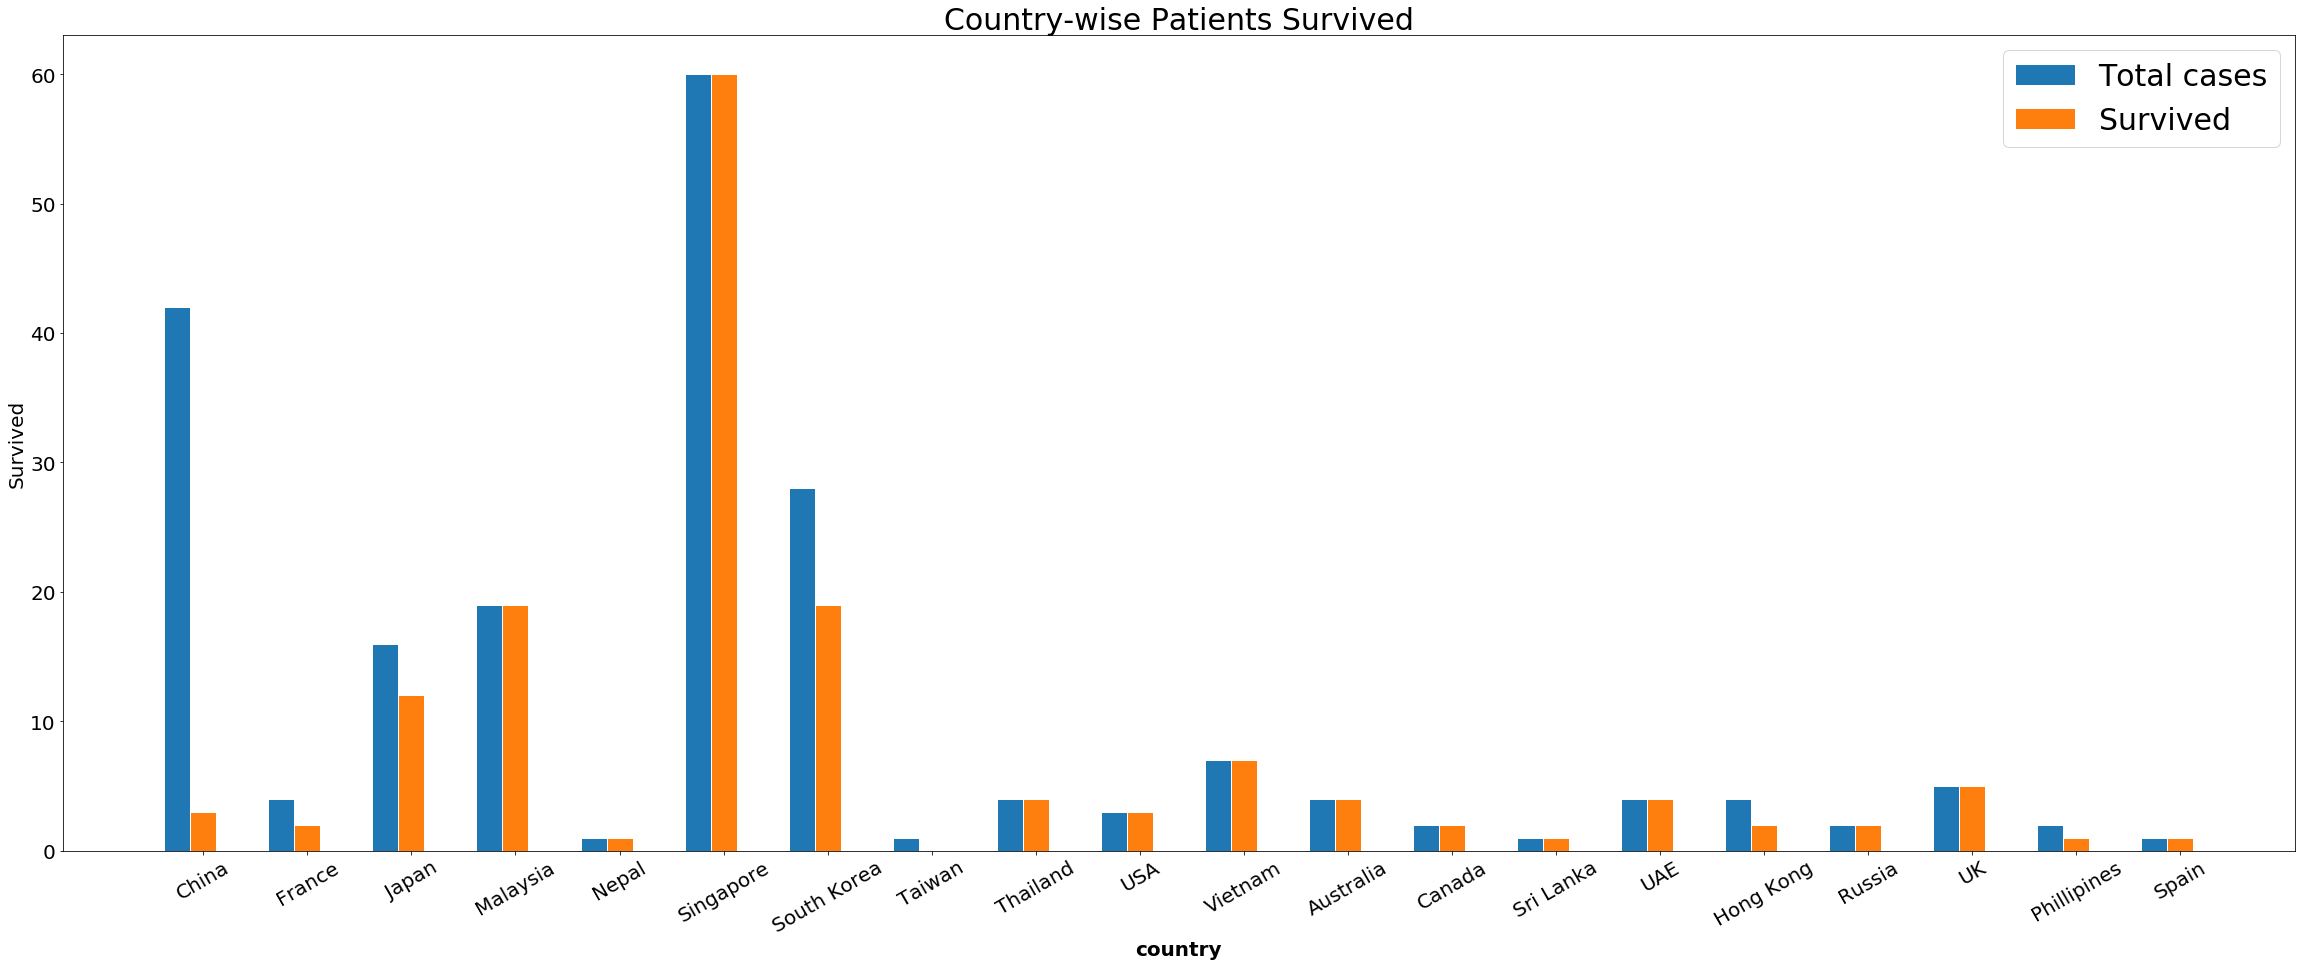

In [454]:

 
fig = plt.figure()
fig, ax = plt.subplots(figsize=(40,15))
barWidth = 0.25
 
# set height of bar
bars1 = total_c
bars2 = r

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Total cases')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Survived')

 
# Add xticks on the middle of the group bars
plt.xlabel('country', fontweight='bold',fontsize=20)
plt.xticks([r + barWidth for r in range(len(bars1))], c, fontsize=20, rotation=30)
plt.yticks(fontsize=20)

plt.ylabel('Survived', fontsize=20)
plt.title('Country-wise Patients Survived',fontsize=30)
 
# Create legend & Show graphic
plt.legend(prop={'size':30})
plt.show()


<b> Singapore has the maximum survial rate compared to any other countries</b>

In [455]:
l={}
t={}
for i in range(1,len(vz)):
    if not vz.country[i-1] in t:
        
        t[vz.country[i-1]]=0
        
    
    t[vz.country[i-1]]+=1
        
        
total_c=[]

for i in t:
    total_c.append(t[i])

        

for i in range(1,len(vz)):
    if not vz.country[i-1] in l:
        l[vz.country[i-1]]=0
        
    if vz.Survival[i-1]==0:
        l[vz.country[i-1]]+=1
        
c=[]
r=[]
for i in l:
    c.append(i)
    r.append(l[i])

print(c,r,total_c)

['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore', 'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia', 'Canada', 'Sri Lanka', 'UAE', 'Hong Kong', 'Russia', 'UK', 'Phillipines', 'Spain'] [39, 2, 4, 0, 0, 0, 9, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0] [42, 4, 16, 19, 1, 60, 28, 1, 4, 3, 7, 4, 2, 1, 4, 4, 2, 5, 2, 1]


<B>COUNTRY WISE PATIENTS DEAD</B>

<Figure size 432x288 with 0 Axes>

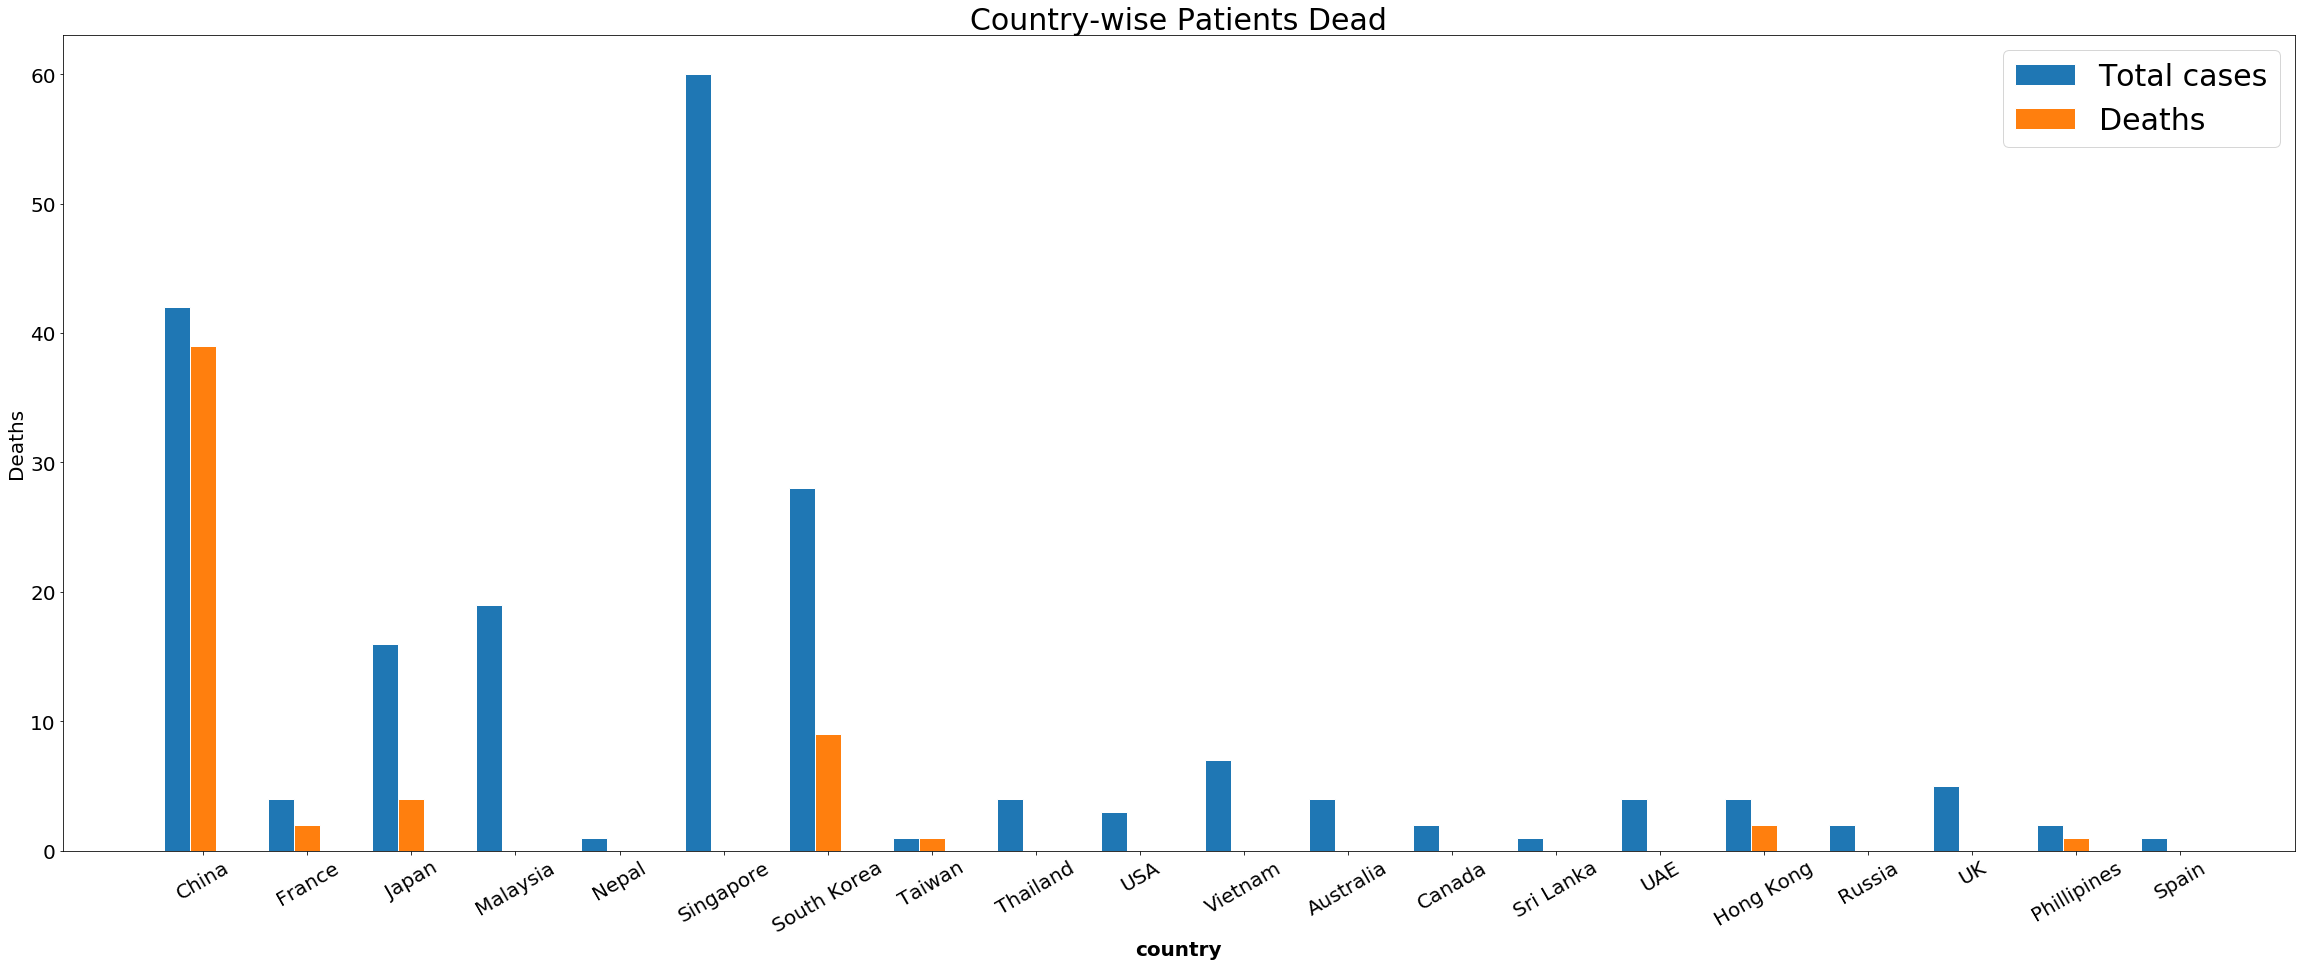

In [456]:

fig = plt.figure()
fig, ax = plt.subplots(figsize=(40,15))
barWidth = 0.25
 
# set height of bar
bars1 = total_c
bars2 = r

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, width=barWidth, edgecolor='white', label='Total cases')
plt.bar(r2, bars2, width=barWidth, edgecolor='white', label='Deaths')

 
# Add xticks on the middle of the group bars
plt.xlabel('country', fontweight='bold',fontsize=20)
plt.xticks([r + barWidth for r in range(len(bars1))], c, fontsize=20, rotation=30)
plt.yticks(fontsize=20)

plt.ylabel('Deaths', fontsize=20)
plt.title('Country-wise Patients Dead',fontsize=30)
 
# Create legend & Show graphic
plt.legend(prop={'size':30})
plt.show()


<B> CHINA HAS MAXIMUM DEATH RATE</B>

In [457]:
l={'Recovery':0,'Death':0}
for i in range(1,212):
    if vz.visiting_wuhan[i-1]==1:
        if vz.Survival[i-1]==1:
            
            l['Recovery']+=1
        
        else:
            l['Death']+=1

            
        
c=[]
r=[]
for i in l:
    c.append(i)
    r.append(l[i])

print(c,r,l)

['Recovery', 'Death'] [31, 1] {'Recovery': 31, 'Death': 1}


<B> WUHAN IMPACT

<Figure size 432x288 with 0 Axes>

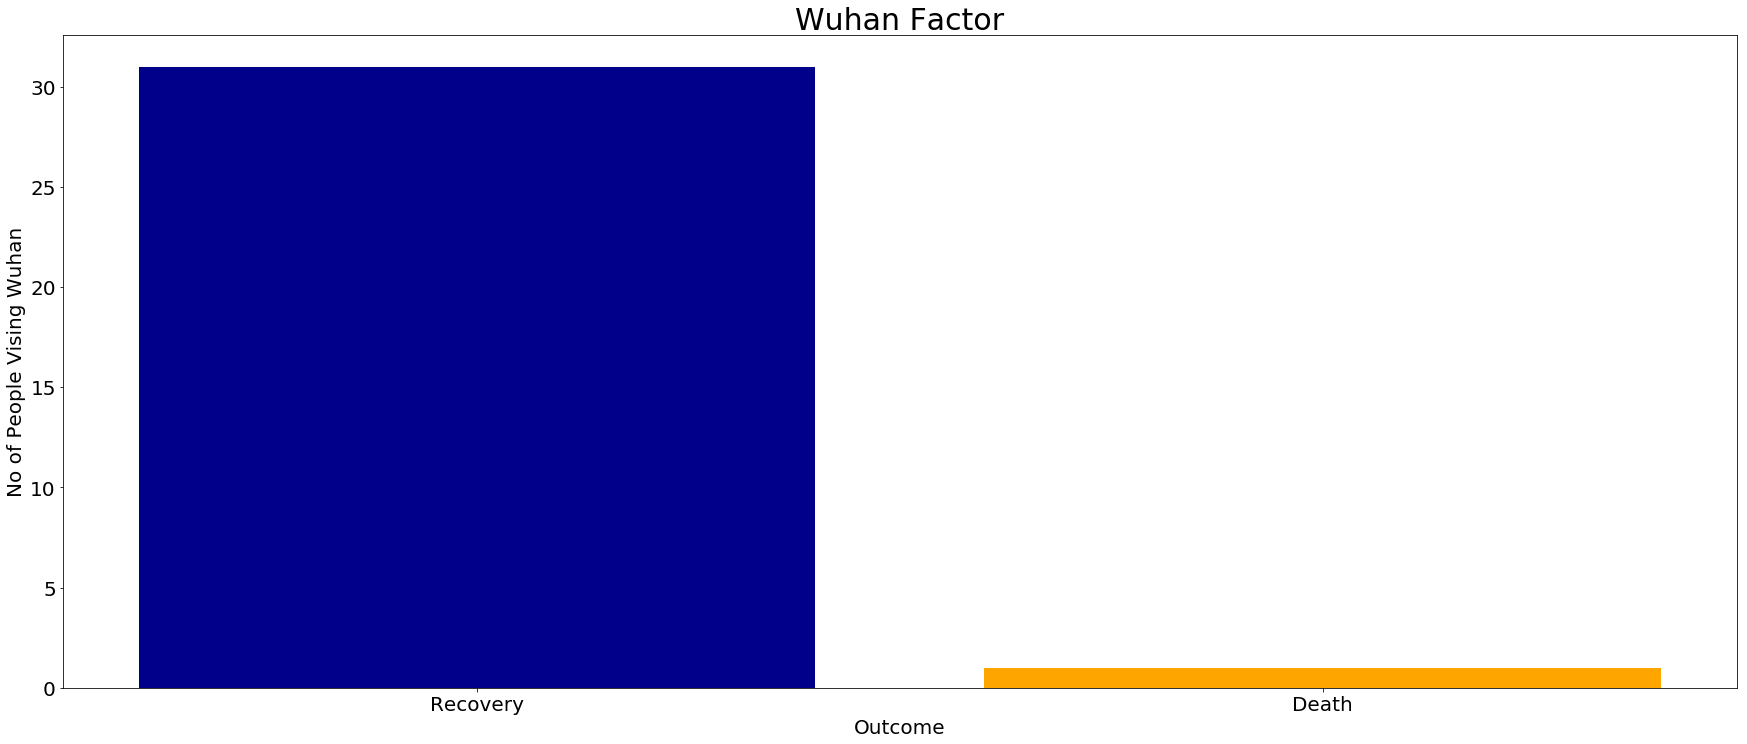

In [458]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,12))

index=1
width=1
ax.bar(c,r,color=['darkblue','orange'])

# plt.bar(index, r)
plt.xlabel('Outcome', fontsize=20)
plt.ylabel('No of People Vising Wuhan', fontsize=20)
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.title('Wuhan Factor',fontsize=30)

plt.show()

In [459]:
l={}

for i in t:
    total_c.append(t[i])

for i in range(1,212):
    if not vz.location[i-1] in l:
        l[vz.location[i-1]]=0
        
    if vz.Survival[i-1]==0:
        l[vz.location[i-1]]+=1
        
c=[]
r=[]
for i in l:
    c.append(i)
    r.append(l[i])

print(c,r,total_c)

['Wuhan', 'Hubei', 'Shandong', 'Paris', 'Kanagawa', 'Japan', 'Tokyo', 'Hokkaido', 'Ishikawa', 'Chiba Prefecture', 'Sagamihara', 'Nagoya City', 'Johor', 'Langkawi', 'Malaysia', 'Kathmandu', 'Singapore', 'South Korea', 'Seoul', 'Taiwan', 'Thailand', 'Washington', 'Illinois', 'Ho Chi Minh City', 'Vinh Phuc', 'NSW', 'Toronto', 'Sri Lanka', 'UAE', 'Hong Kong', 'Kowloon', 'Tyumen', 'Zabaikalsky', 'London', 'Manila', 'Canary Islands', 'Mallorca'] [32, 7, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0] [42, 4, 16, 19, 1, 60, 28, 1, 4, 3, 7, 4, 2, 1, 4, 4, 2, 5, 2, 1, 42, 4, 16, 19, 1, 60, 28, 1, 4, 3, 7, 4, 2, 1, 4, 4, 2, 5, 2, 1]


<B> CITY-WISE PATIENTS DEAD</B>

<Figure size 432x288 with 0 Axes>

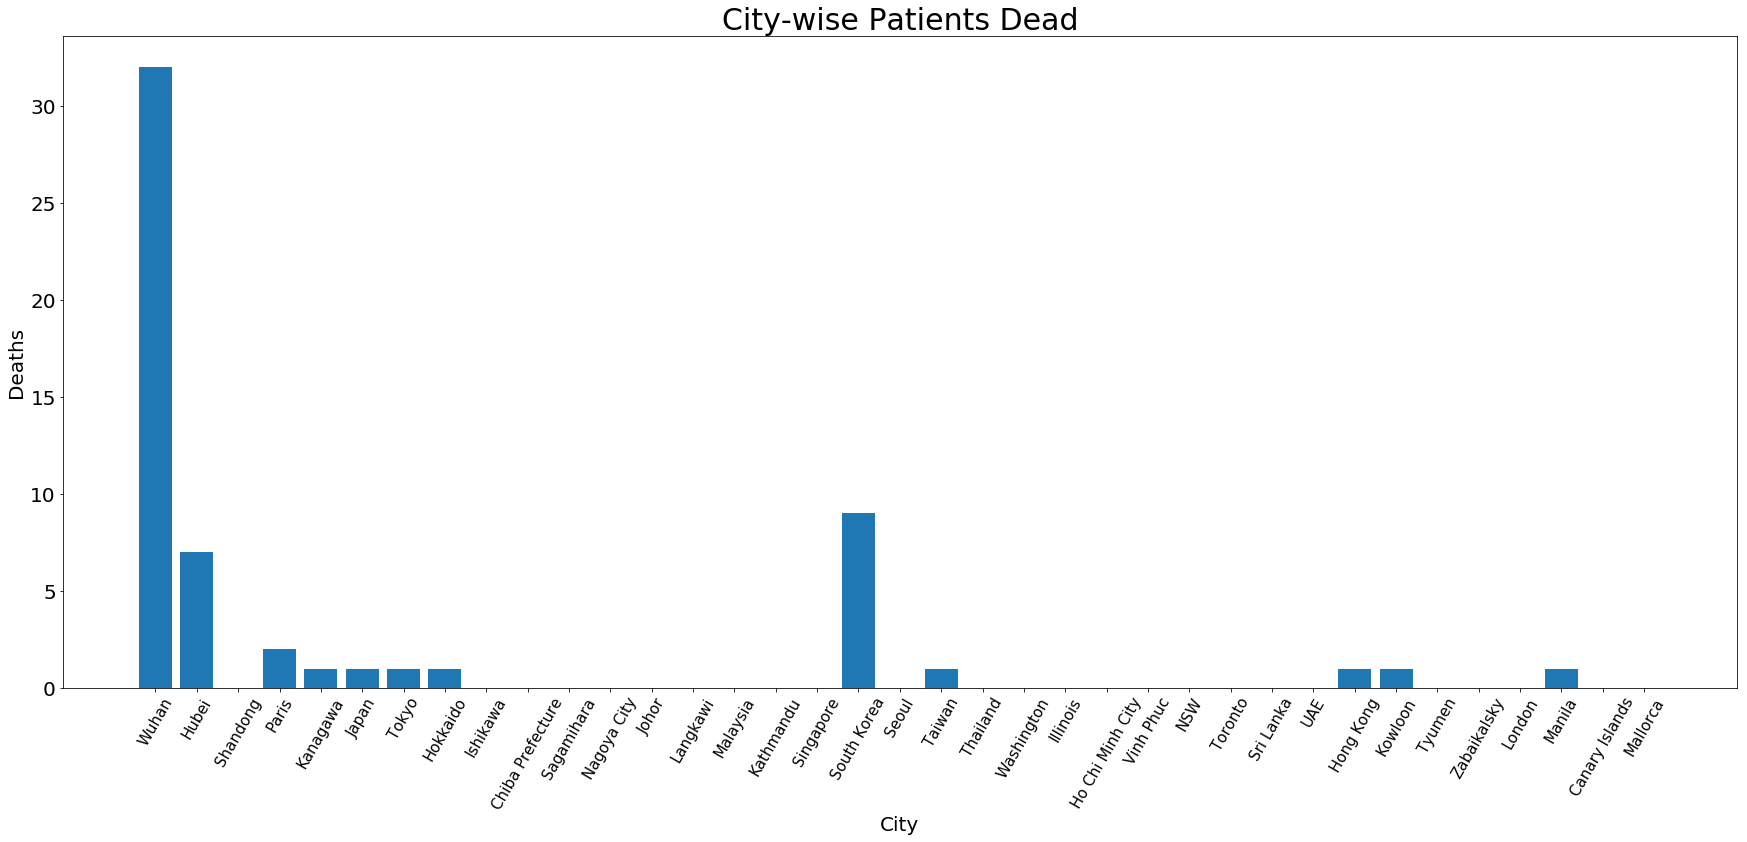

In [460]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,12))


ax.bar(c,r)

# plt.bar(index, r)

plt.xlabel('City', fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.xticks(fontsize=15, rotation=60)
plt.yticks(fontsize=20, rotation=0)
plt.title('City-wise Patients Dead',fontsize=30)

plt.show()

<B> WUHAN HAS MAXIMUM DEATH RATE</B>


In [463]:
c=0
symp=[]
symp_count=[]
for i in vz:
    
    if i=='fever':
        c=1
        
    if c==1:
        symp.append(i)
        count=0
                
        s=symp[-1]

        for j in vz[s]:
            if j==1 and vz.Survival[j]==0:
                    count+=1
                
        symp_count.append(count)
        
print(symp,symp_count)

                
        
                

['fever', 'cough', 'breathlessness', 'chills', 'joint_pain', 'throat_discomfort', 'runny_nose', 'fatigue', 'abdominal_pain', 'diarrhea', 'cold', 'pneumonia', 'vomiting', 'loss_of_appetite', 'malaise', 'headache', 'difficulty_breathing', 'sputum', 'muscle_pain', 'dyspnea', 'nausea', 'nasal_discharge', 'respiratory_distress', 'mild_cough', 'sneeze', 'heavy_head', 'chest_pain', 'thirst', 'flu', 'mild_fever', 'high_fever', 'muscle_cramps', 'aching_muscles', 'sore_body', 'chest_discomfort', 'chill', 'muscle_aches', 'reflux', 'physical_discomfort', 'tired', 'myalgia', 'cough_with_sputum'] [37, 16, 4, 3, 0, 6, 2, 3, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


<B> SYMPTOMS ANALYSIS</B>

<Figure size 432x288 with 0 Axes>

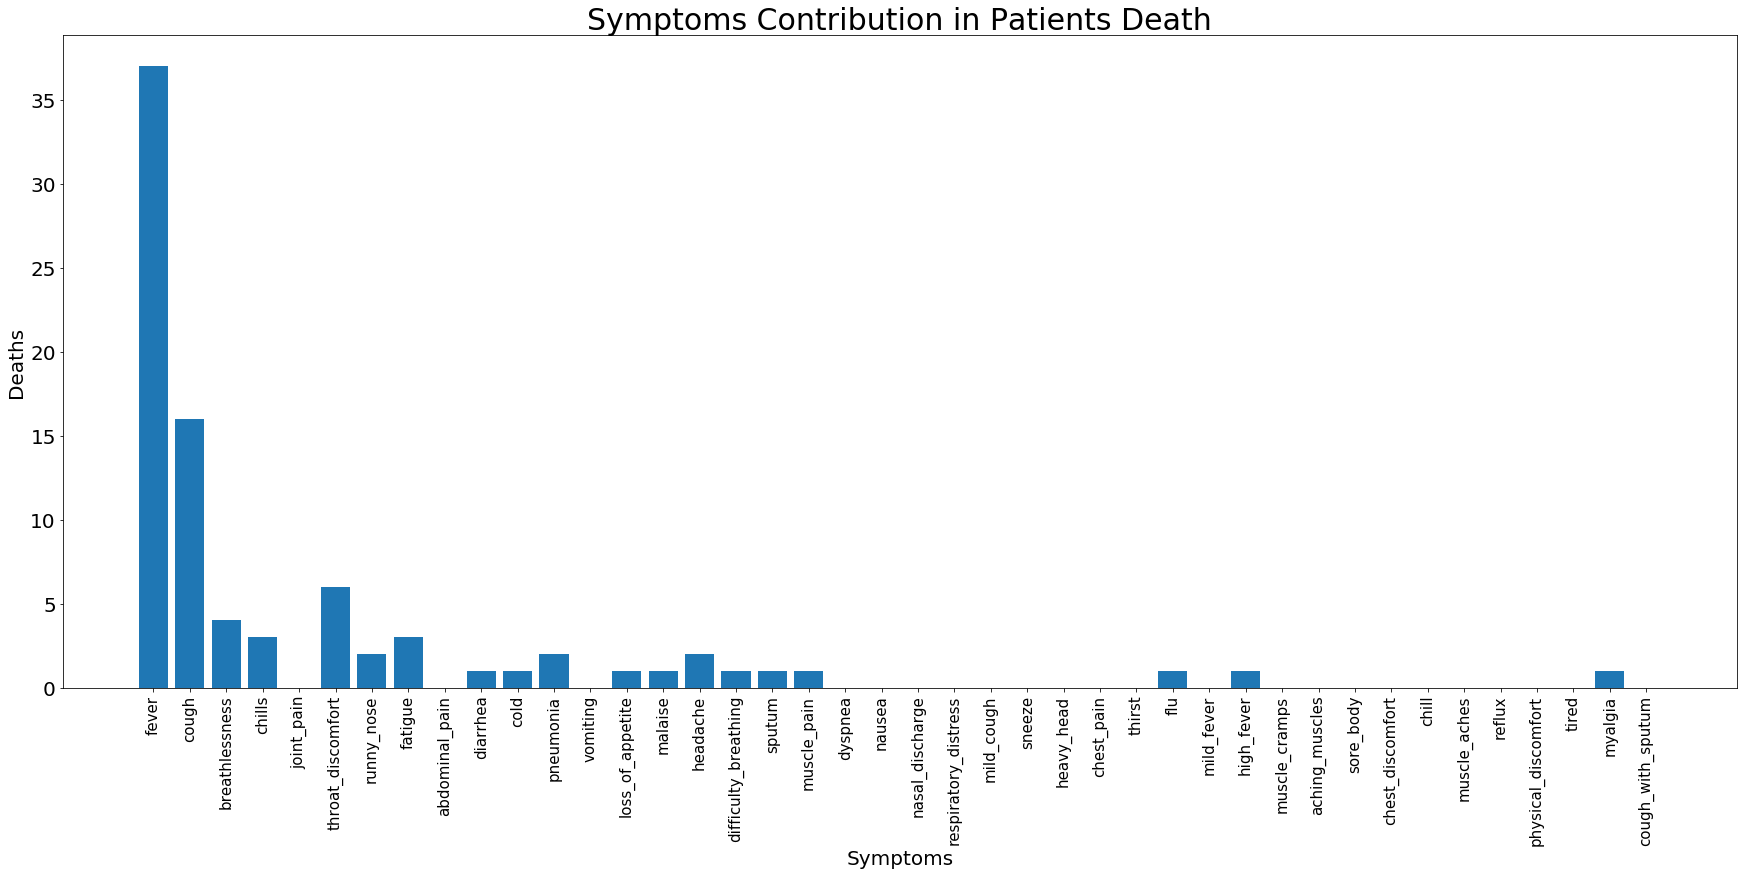

In [464]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,12))


ax.bar(symp,symp_count)

plt.xlabel('Symptoms', fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.xticks(fontsize=15, rotation=90)
plt.yticks(fontsize=20, rotation=0)
plt.title('Symptoms Contribution in Patient''s Death',fontsize=30)

plt.show()

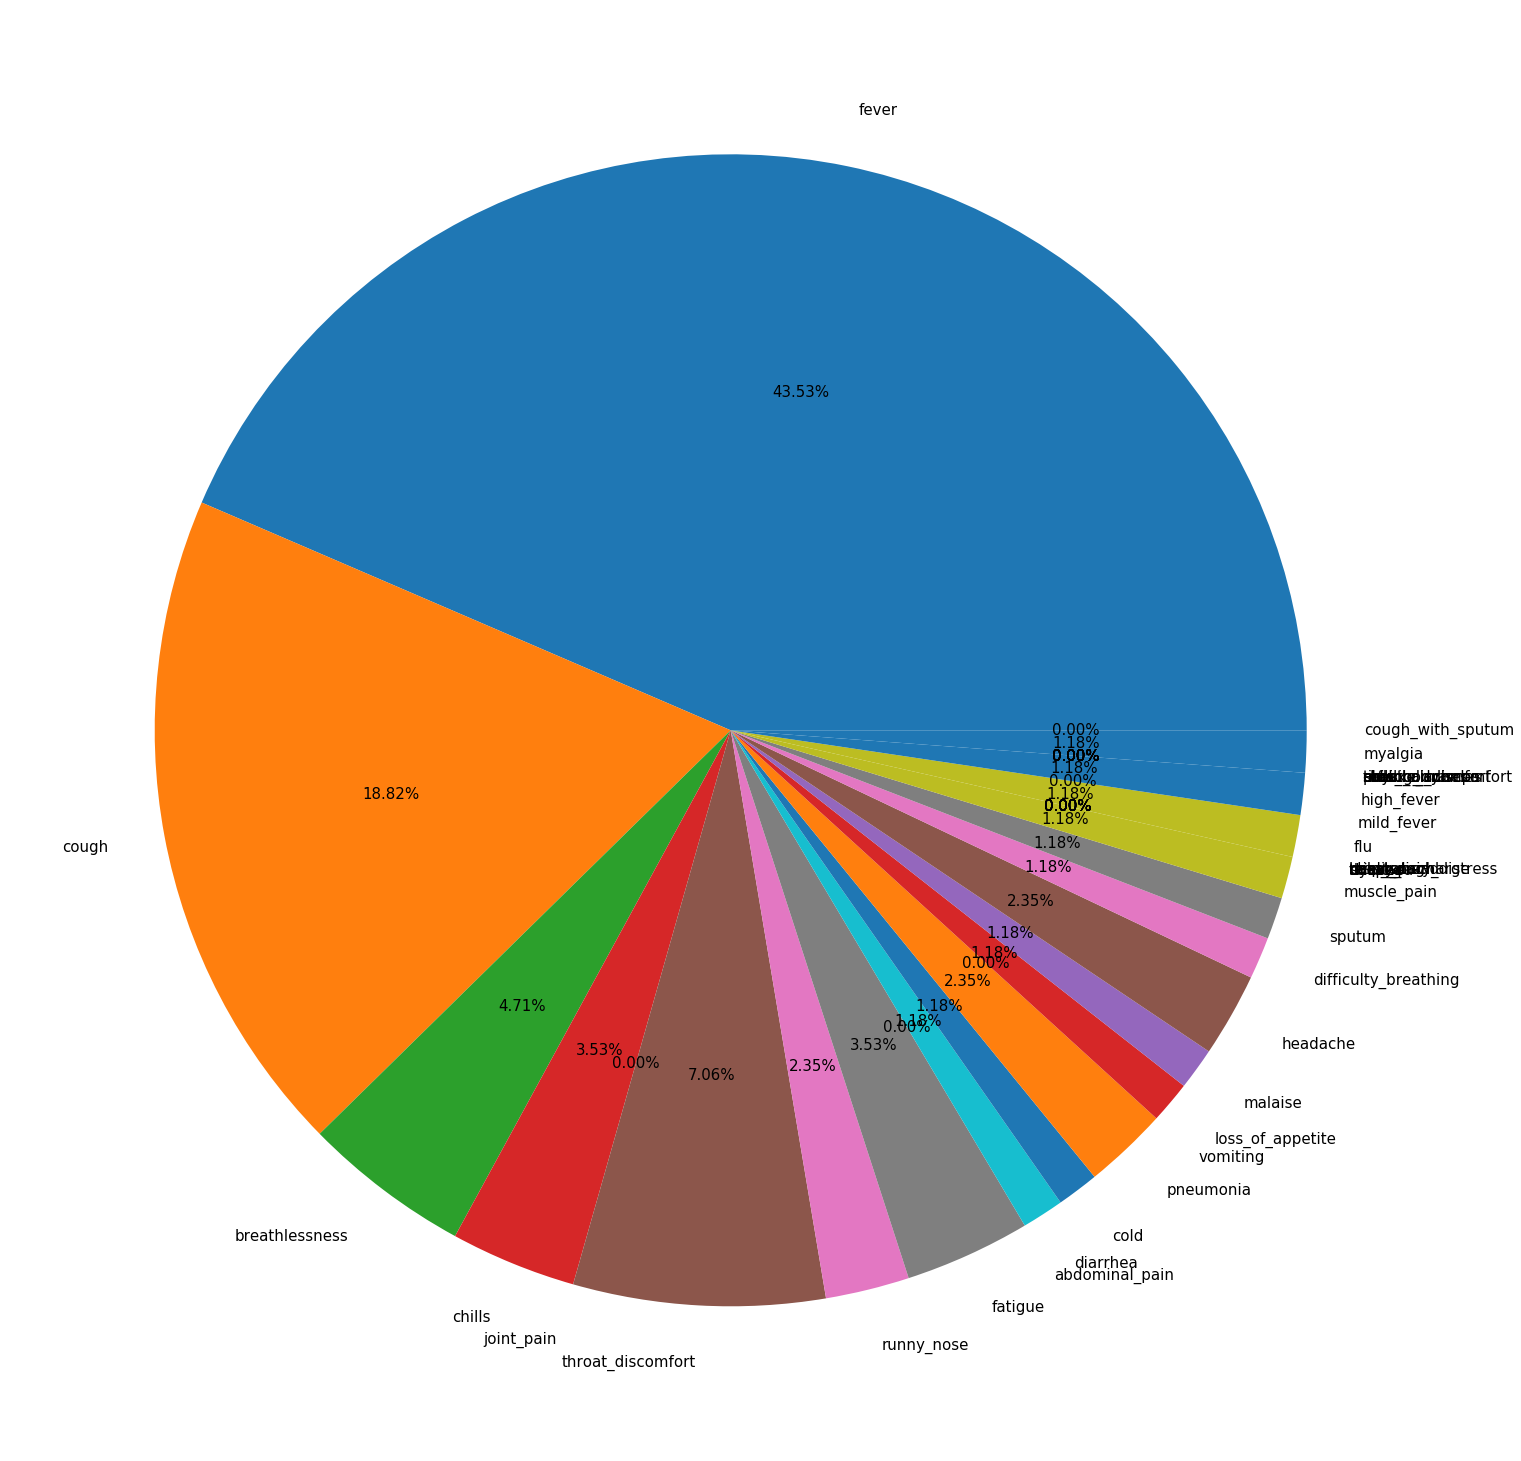

In [432]:
fig = plt.figure(figsize=[20, 20])
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
Symptoms = symp
Sympt_c =symp_count
ax.pie(Sympt_c, labels =Symptoms,autopct='%1.2f%%',textprops={'fontsize': 15})
# plt.pie(labels=Symptoms,autopct='%1.1f%%', shadow=True, startangle=140)
# plt.legend(prop={'size':10})
plt.show()

<B> FEVER HAS THE HIGHEST CONTRIBUTION </B>

<B> AGE BASED DEATH RATE</B>

In [467]:
ag=[]
dead=[]
for i in range(10,101,10):
    ag.append(i)


for i in range(10):
    count=0
    for j in range(len(vz)):
        if ag[i]==10:
            if vz.age[j]<=ag[i] and vz.Survival[j]==0:
                count+=1
                
        if ag[i]==100:
            if vz.age[j]>ag[i-1] and vz.Survival[j]==0:
                count+=1
                
                
        else:
            if vz.age[j]>ag[i-1] and vz.age[j]<=ag[i] and vz.Survival[j]==0:
                count+=1
                
    dead.append(count)
    
print(ag,dead)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100] [0, 0, 0, 3, 3, 9, 18, 11, 14, 0]


<Figure size 432x288 with 0 Axes>

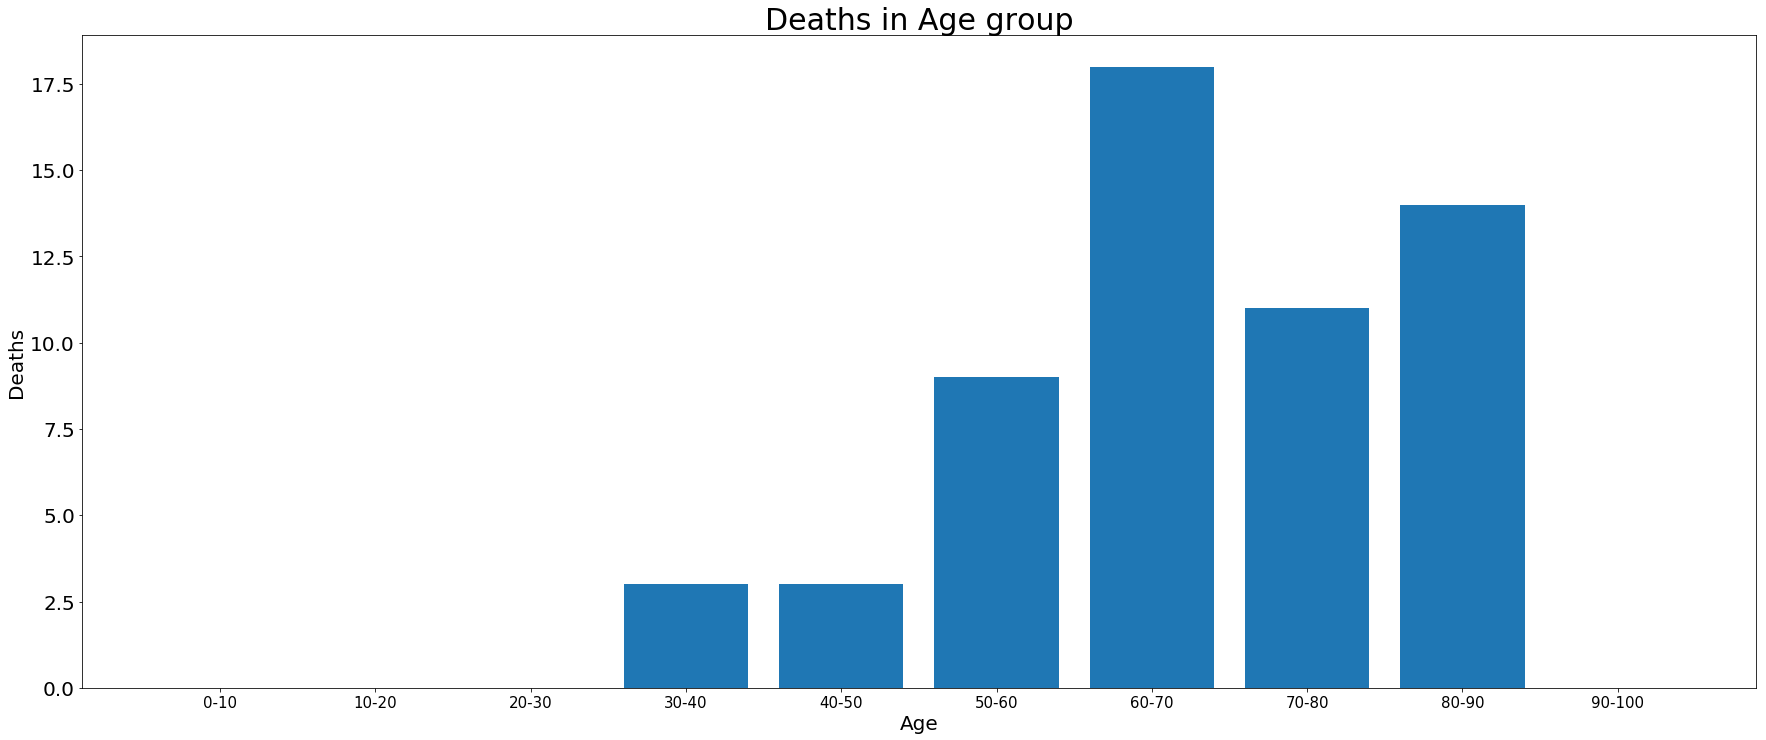

In [468]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(30,12))
ag = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']


ax.bar(ag,dead)

plt.xlabel('Age', fontsize=20)
plt.ylabel('Deaths', fontsize=20)
plt.xticks(fontsize=15, rotation=0)
# ax.set_xticklabels(ag)
           
# ax.set_yticklabels(dead)
plt.yticks(fontsize=20, rotation=0)
plt.title('Deaths in Age group',fontsize=30)

plt.show()

<B>DROPPING COLUMNS OF SYMPTOMS THAT HAS THE LOWEST IMPACT </B>

In [350]:
vz.drop(['patient_id','from_wuhan','joint_pain','chill','abdominal_pain','vomiting','dyspnea','nausea','nasal_discharge','respiratory_distress','mild_cough','sneeze','heavy_head','chest_pain','thirst','mild_fever','muscle_cramps','aching_muscles','sore_body','chest_discomfort','muscle_aches','reflux','physical_discomfort','tired','cough_with_sputum'],axis =1,inplace =True)

In [351]:

le = preprocessing.LabelEncoder()

vz['country'] = le.fit_transform(vz['country'])


In [352]:
vz['location'] = le.fit_transform(vz['location'])


In [353]:
vz['location'].value_counts()

24    60
35    32
25    27
15    10
5      9
9      8
33     5
14     5
20     4
18     4
3      4
28     4
29     4
32     4
4      2
10     2
6      2
19     2
30     2
17     2
2      2
12     2
7      1
8      1
1      1
36     1
11     1
13     1
16     1
21     1
22     1
23     1
26     1
27     1
31     1
34     1
0      1
Name: location, dtype: int64

In [354]:
vz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 25 columns):
location                211 non-null int64
country                 211 non-null int64
gender                  211 non-null int64
age                     211 non-null int64
visiting_wuhan          211 non-null int64
Survival                211 non-null int64
fever                   211 non-null int64
cough                   211 non-null int64
breathlessness          211 non-null int64
chills                  211 non-null int64
throat_discomfort       211 non-null int64
runny_nose              211 non-null int64
fatigue                 211 non-null int64
diarrhea                211 non-null int64
cold                    211 non-null int64
pneumonia               211 non-null int64
loss_of_appetite        211 non-null int64
malaise                 211 non-null int64
headache                211 non-null int64
difficulty_breathing    211 non-null int64
sputum                  211 non-nul

In [355]:
survival = vz['Survival']
vz = vz.drop(['Survival'],axis =1)


In [356]:

vz.insert(24,'survival',survival)

In [357]:
vz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 25 columns):
location                211 non-null int64
country                 211 non-null int64
gender                  211 non-null int64
age                     211 non-null int64
visiting_wuhan          211 non-null int64
fever                   211 non-null int64
cough                   211 non-null int64
breathlessness          211 non-null int64
chills                  211 non-null int64
throat_discomfort       211 non-null int64
runny_nose              211 non-null int64
fatigue                 211 non-null int64
diarrhea                211 non-null int64
cold                    211 non-null int64
pneumonia               211 non-null int64
loss_of_appetite        211 non-null int64
malaise                 211 non-null int64
headache                211 non-null int64
difficulty_breathing    211 non-null int64
sputum                  211 non-null int64
muscle_pain             211 non-nul

# K NEAREST NEIGHBOR

In [358]:
x = vz.iloc[:,0:24]
y = vz.iloc[:,24:]


In [359]:
# np.set_printoptions(threshold=sys.maxsize)
# print(x)
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 1 columns):
survival    211 non-null int64
dtypes: int64(1)
memory usage: 1.7 KB


In [360]:
# np.set_printoptions(threshold=sys.maxsize)
# print(y)

In [361]:
# X= pf.iloc[:,1:7].values()
# Y=vz['Survival']
# X_train,Y_train,X_test,Y_test = train_test_split(X,Y,stratify =Y,random_state =0)

In [362]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify =y,random_state=0)

# METHOD 1

In [363]:
k_range = range(1, 24)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversi

[0.8113207547169812, 0.8113207547169812, 0.8301886792452831, 0.8490566037735849, 0.8490566037735849, 0.8490566037735849, 0.8301886792452831, 0.8113207547169812, 0.8113207547169812, 0.8113207547169812, 0.8113207547169812, 0.8490566037735849, 0.8113207547169812, 0.8490566037735849, 0.8113207547169812, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793, 0.7924528301886793]


C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversi

Text(0,0.5,'Testing Accuracy')

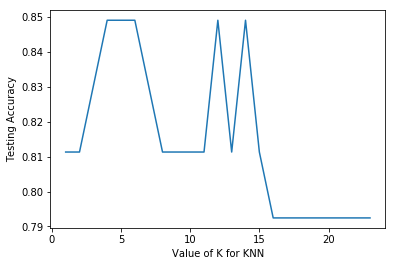

In [364]:

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [365]:
k1 = scores.index(max(scores))+1

In [366]:
k1

4

<b> The value of neighbors in KNeighbors Classifier is 4

In [367]:
y_test

,survival
83,1
207,0
171,1
149,1
61,0
183,1
113,1
3,0
145,1
144,1


In [368]:
knn = KNeighborsClassifier(n_neighbors=k1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred

C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [369]:
m =metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))


0.8490566037735849


<b>The accuracy of KNeighbors Classifier is 0.8490566</b>

In [370]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[10,  5],
       [ 3, 35]], dtype=int64)

In [371]:
print (classification_report(y_test,y_pred))
knnvar = classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.77      0.67      0.71        15
          1       0.88      0.92      0.90        38

avg / total       0.85      0.85      0.85        53



# Matthews Coefficient

In [372]:
matthews_corrcoef(y_test, y_pred) 


0.6153266251354153

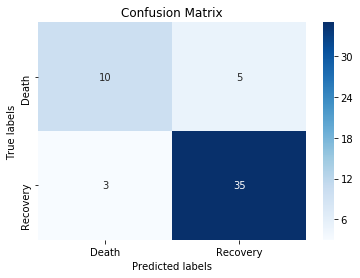

In [373]:
ax= plt.subplot()
sns.heatmap(cm,cmap="Blues", annot=True); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Death', 'Recovery']); ax.yaxis.set_ticklabels(['Death', 'Recovery']);


# METHOD 2

In [374]:

# creating odd list of K for KNN
neighbors = list(range(1, 24))
cv_scores = []
# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    cv_scores.append((metrics.accuracy_score(y_test,y_pred))) 

# cv_scores.append(scores.mean())

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expect

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expect

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expect

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


In [375]:
cv_scores

[0.8113207547169812,
 0.8113207547169812,
 0.8301886792452831,
 0.8490566037735849,
 0.8490566037735849,
 0.8490566037735849,
 0.8301886792452831,
 0.8113207547169812,
 0.8113207547169812,
 0.8113207547169812,
 0.8113207547169812,
 0.8490566037735849,
 0.8113207547169812,
 0.8490566037735849,
 0.8113207547169812,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793,
 0.7924528301886793]

In [376]:
s = np.mean(scores)
p = 100
a = 0
for i in cv_scores:
    b =abs(s-i)
    if b < p :
        p =b
        a = i
    
j = cv_scores.index(a)
v = j+1
print(v)
    
    






4


In [377]:
knn = KNeighborsClassifier(n_neighbors=v)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred

C:\Users\raone\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [378]:
print(metrics.accuracy_score(y_test,y_pred))

0.8490566037735849


<b>Accuracy is 0.8490</b>

# LOGISTIC REGRESSION

In [379]:
le = LogisticRegression(random_state = 0)
le.fit(x_train, y_train)

C:\Users\raone\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [380]:
y_pred = le.predict(x_test)

In [381]:
y_pred

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# Matthews Coefficient

In [382]:
matthews_corrcoef(y_test, y_pred) 

0.6609187383196987

# JACCARD INDEX

In [383]:
p =jaccard_similarity_score(y_test, y_pred)
print(p)

0.8679245283018868


<b>Logistic Regression jaccard score is .867924</b>

# Confusion Matrix

In [384]:
cm = confusion_matrix(y_test, y_pred)


In [385]:
cm
#True positive = 36,False positive =5
#False negative =2,True negative =10

array([[10,  5],
       [ 2, 36]], dtype=int64)

<b> True Positive =36, False Positive = 5</b>
<br>
<b>False negative =2 , True negative = 10</b>

In [386]:
# y_test.value_counts()

In [387]:

print (classification_report(y_test,y_pred))
#Recall = True positive/true positive + false negative
#precision = True positive/true positive +false positive
logvarr = classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.83      0.67      0.74        15
          1       0.88      0.95      0.91        38

avg / total       0.87      0.87      0.86        53



In [388]:
# plt.matshow(cm,cmap='binary')

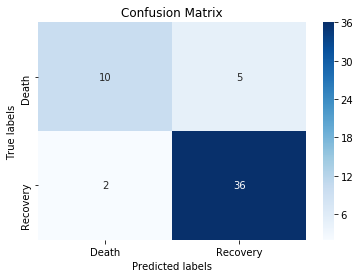

In [389]:
  

ax= plt.subplot()
sns.heatmap(cm,cmap="Blues", annot=True); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Death', 'Recovery']); ax.yaxis.set_ticklabels(['Death', 'Recovery']);



In [390]:
yhat_prob = le.predict_proba(x_test)
yhat_prob


array([[3.07852982e-02, 9.69214702e-01],
       [3.99308219e-02, 9.60069178e-01],
       [6.65445575e-03, 9.93345544e-01],
       [4.48999767e-02, 9.55100023e-01],
       [7.68680009e-01, 2.31319991e-01],
       [5.89092733e-04, 9.99410907e-01],
       [1.21833625e-01, 8.78166375e-01],
       [9.75580714e-01, 2.44192863e-02],
       [2.65472911e-02, 9.73452709e-01],
       [1.65218623e-01, 8.34781377e-01],
       [1.34099039e-01, 8.65900961e-01],
       [1.99657849e-01, 8.00342151e-01],
       [8.95465899e-01, 1.04534101e-01],
       [6.49664233e-03, 9.93503358e-01],
       [6.35600524e-02, 9.36439948e-01],
       [7.40149208e-01, 2.59850792e-01],
       [6.04915668e-02, 9.39508433e-01],
       [1.05175230e-02, 9.89482477e-01],
       [3.60080121e-01, 6.39919879e-01],
       [6.31885395e-02, 9.36811460e-01],
       [8.78984554e-01, 1.21015446e-01],
       [4.41196544e-01, 5.58803456e-01],
       [1.31066545e-01, 8.68933455e-01],
       [7.81405681e-02, 9.21859432e-01],
       [7.292296

# LOG LOSS

In [391]:

log_loss(y_test, yhat_prob)


0.36158591007823887

<b> Log_loss = 0.36158</b>

# COEFFICIENT

In [392]:
parameters = le.coef_


In [393]:
parameters

array([[-0.03846131,  0.34534984, -0.44219239, -0.05499389,  1.43430175,
         1.34550109,  0.09954175, -0.64463703,  0.08422028,  0.18334614,
         0.14467108,  0.4075305 ,  0.14250722, -0.38319596, -0.5770161 ,
         0.32781726,  0.        ,  0.08568592,  0.        ,  0.17768133,
         0.03347672,  0.00580869,  0.03347672,  0.        ]])

# DECISION TREE

In [394]:

clf = DecisionTreeClassifier(random_state =0)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
dec_tree_pred = clf.predict(x_test)


In [395]:
dec_tree_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

# Matthews Coefficient

In [396]:
matthews_corrcoef(y_test, dec_tree_pred) 

0.7126768076195258

In [397]:

z= metrics.accuracy_score(y_test, dec_tree_pred)
print("Accuracy:",metrics.accuracy_score(y_test, dec_tree_pred))

Accuracy: 0.8867924528301887


In [398]:
cm = confusion_matrix(y_test, dec_tree_pred)
decvarr = classification_report(y_test,dec_tree_pred)
print(classification_report(y_test,dec_tree_pred))


             precision    recall  f1-score   support

          0       0.85      0.73      0.79        15
          1       0.90      0.95      0.92        38

avg / total       0.88      0.89      0.88        53



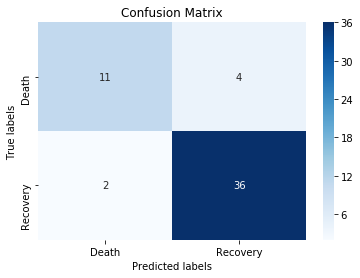

In [399]:
ax= plt.subplot()
sns.heatmap(cm,cmap="Blues", annot=True); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Death', 'Recovery']); ax.yaxis.set_ticklabels(['Death', 'Recovery']);


# Conclusion

In [400]:
from tabulate import tabulate
print(tabulate([['K Nearest Neighbor', m,0.85,0.85,0.85,.66], ['Logistic Regression', p,0.87,0.87,0.86,.66],['Decision Tree', z,0.88,0.89,0.88,0.71]], headers=['Algorithm', 'Accuracy','Precision','Recall','F1-score','Mathews Correlation Coefficient'], tablefmt='orgtbl'))


| Algorithm           |   Accuracy |   Precision |   Recall |   F1-score |   Mathews Correlation Coefficient |
|---------------------+------------+-------------+----------+------------+-----------------------------------|
| K Nearest Neighbor  |   0.849057 |        0.85 |     0.85 |       0.85 |                              0.66 |
| Logistic Regression |   0.867925 |        0.87 |     0.87 |       0.86 |                              0.66 |
| Decision Tree       |   0.886792 |        0.88 |     0.89 |       0.88 |                              0.71 |


<b>Classification of the covid dataset on the K_Nearest_Neighbors,Logistic Regression and Decision Tree algorithms gave the accuracy of 0.84,0.86 and 0.88 respectively.<b>
<br>
It is observed that Decision Tree Algorithm give the best accuracy as it works best for small datasets.
    